In [170]:
import scanpy as sc
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["figure.figsize"]=(4,4)
import sys
sys.path.insert(0,"/Users/snyquist/Dropbox (Gladstone)/helper_functions")
#import sys
#sys.path.insert(0,"/wynton/home/engelhardt/snyquist/helper_functions")
#import plotting_helpers as ph

In [146]:
adata = sc.read_h5ad("../datasets/adata_epithelial_no_doublets_FINAL.h5ad")

In [2]:
Futs = ["FUT1","FUT2","FUT3","FUT4","FUT5","FUT6","FUT7","FUT8","FUT9","FUT10","FUT11"]
st32 = ["ST3GAL1","ST3GAL2","ST3GAL3","ST3GAL4","ST3GAL5","ST3GAL6"]
st6gal = ["ST6GAL1","ST6GAL2"]
gcnt = ["GCNT1","GCNT2","GCNT3","GCNT4"]
b3gnt = ["B3GNT2","B3GNT3","B3GNT4","B3GNT5","B3GNT6","B3GNT7","B3GNT8","B3GNT9"]
b3galt = ["B3GALT1","B3GALT2","B3GALT4","B3GALT5","B3GALT6"]
b4galt = ["B4GALT1","B4GALT2","B4GALT3","B4GALT4","B4GALT5","B4GALT6","B4GALT7","B4GALT8","B4GALT9"]
st6galnac = ["ST6GALNAC1","ST6GALNAC2","ST6GALNAC3","ST6GALNAC4","ST6GALNAC5","ST6GALNAC6"]
b3gat = ["B3GAT1","B3GAT2","B3GAT3","B2GLCT"]
b3galnt = ["B3GALNT1","B3GALNT2"]
b4galnt = ["B4GALNT1","B4GALNT2","B4GALNT3","B4GALNT4"]
genelists = [Futs,st32,st6gal,gcnt,b3gnt,b3galt,b4galt,st6galnac,b3gat,b4galnt,b3galnt]


In [10]:
#all_milk_epi = sc.read_h5ad("../data_objects/epi_integrated_nodub.h5ad")

In [79]:
#immune = sc.read_h5ad("../data_objects/immune_nodoublets.h5ad")

In [81]:
immune.obs['immune clusters'].unique()

['cDC', 'NK cell', 'GD T cell', 'Macrophage', 'CD4 T cells', 'CD8 T cells', 'B cell', 'Plasma']
Categories (8, object): ['B cell', 'CD4 T cells', 'CD8 T cells', 'GD T cell', 'Macrophage', 'NK cell', 'Plasma', 'cDC']

In [88]:
all_hmo_genes = []
for g in genelists:
    all_hmo_genes = all_hmo_genes + [i for i in g if i in LC1s.raw.var_names]

In [99]:
HMO=pd.read_csv("HMO_nmol_ml.csv")

In [69]:
HMO.columns

Index(['Sample#', 'Close_sample#', 'time_postpartum_days',
       'time_postpartum_weeks', 'Donor', 'Name', 'time', 'Secretor',
       'Diversity', 'Evenness', '2'FL', '3FL', 'DFLac', '3'SL', '6'SL', 'LNT',
       'LNnT', 'LNFP I', 'LNFP II', 'LNFP III', 'LSTb', 'LSTc', 'DFLNT', 'LNH',
       'DSLNT', 'FLNH', 'DFLNH', 'FDSLNH', 'DSLNH', 'SUM', 'Sia', 'Fuc'],
      dtype='object')

In [70]:
HMO_names = ['2\'FL', '3FL', 'DFLac', '3\'SL', '6\'SL', 'LNT',
       'LNnT', 'LNFP I', 'LNFP II', 'LNFP III', 'LSTb', 'LSTc', 'DFLNT', 'LNH',
       'DSLNT', 'FLNH', 'DFLNH', 'FDSLNH', 'DSLNH']

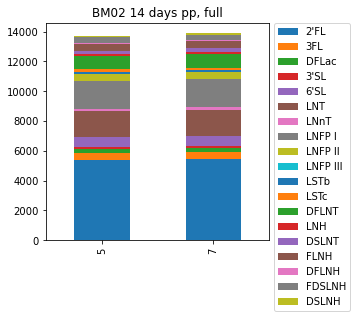

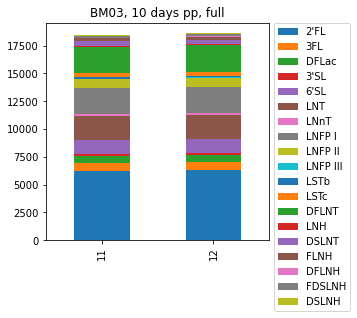

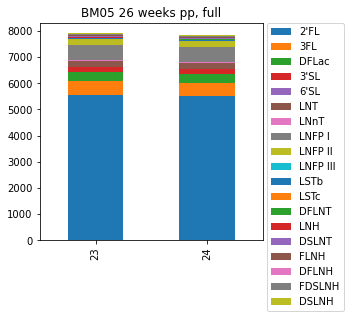

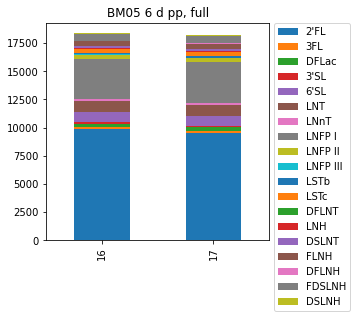

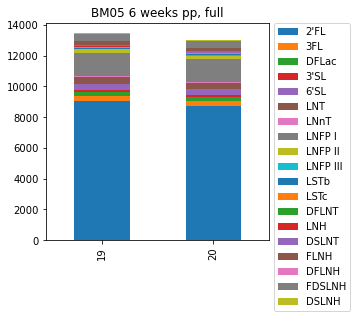

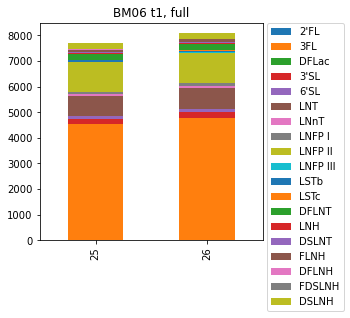

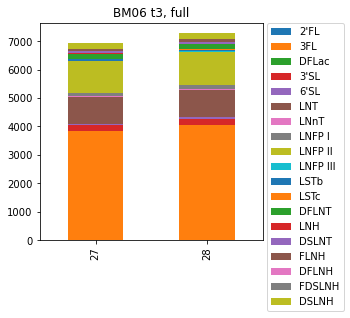

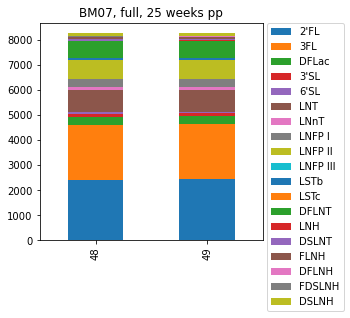

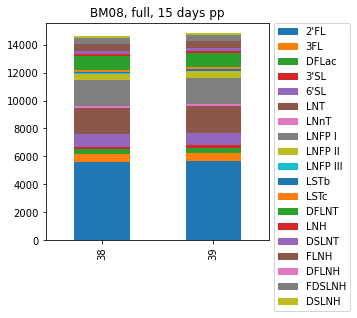

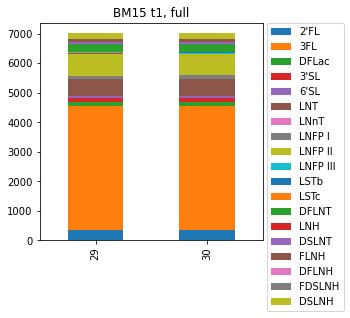

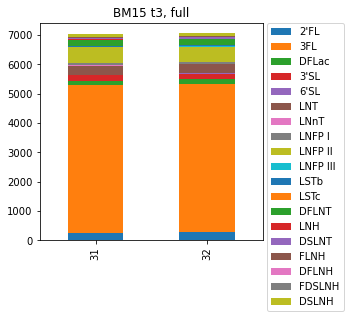

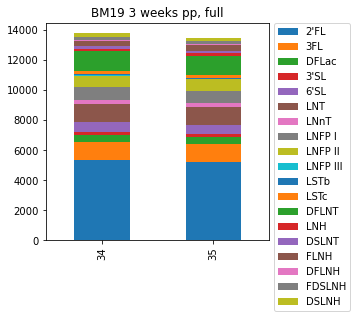

In [57]:
for i in HMO.groupby("Name"):
    if i[1].shape[0] > 1:
        # make a stacked bar of the HMOs in the replicates
        i[1][HMO_names].plot.bar(stacked=True)
        plt.title(i[0])
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


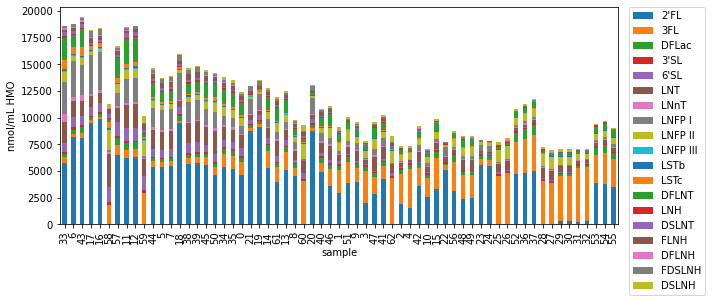

In [198]:
plt.rcParams["figure.figsize"]=(10,4)
HMO.sort_values("time_postpartum_weeks")[HMO_names].plot.bar(stacked=True)
plt.ylabel("nmol/mL HMO")
plt.xlabel("sample")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Text(0, 0.5, 'Donor')

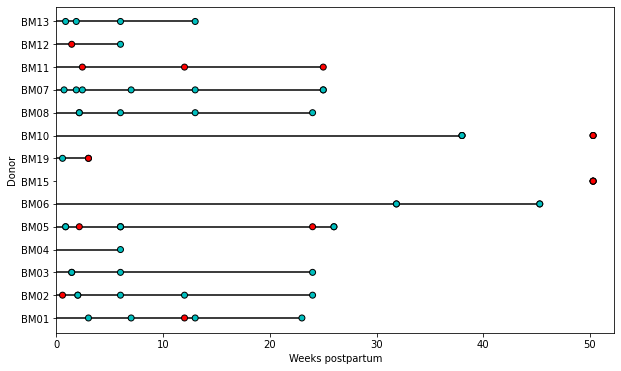

In [200]:
import numpy as np
import math
plt.rcParams["figure.figsize"]=(10,6)

# plot all samples by time
x_vals = [] # weeks postpartum
y_vals = [] # donor index
y_ticklabels = list(HMO["Donor"].unique()) # donor names
colors = [] # blue for with matched sample, red for without
max_timepp = HMO["time_postpartum_weeks"].max()+5
for d,h in HMO.groupby("Donor"):
    donor_ind = y_ticklabels.index(d)
    max_x = 0
    for i in h.index:
        s = h.loc[i,"Sample#"]
        if type(s)==str:
            colors.append("c")
        else:
            colors.append("r")
            
        t = h.loc[i,"time_postpartum_weeks"]
        if not math.isnan(t):
            x_vals.append(t)
            if t > max_x:
                max_x = t
        else:
            x_vals.append(max_timepp)
            #max_x = max_timepp
        
        y_vals.append(donor_ind)
    
    plt.plot([0,max_x],[donor_ind,donor_ind],c="k",zorder=1)
plt.scatter(x_vals,y_vals,c=colors,edgecolors='black')
plt.yticks(range(0,len(y_ticklabels)),y_ticklabels)
xticks,x_labels = plt.xticks()
plt.xlim(0,max_timepp+2)
#plt.xticks(list(xticks)+[max_timepp],list(xticks)+["NA"])
plt.xlabel("Weeks postpartum")
plt.ylabel("Donor")

In [106]:
HMO.shape

(63, 32)

In [107]:
HMO_sub=HMO.loc[HMO["Sample#"].notna()]

In [109]:
HMO_sub.shape

(46, 32)

In [110]:
#remove duplicate rows
HMO_sub = HMO_sub.loc[~HMO_sub["Sample#"].duplicated()]

In [111]:
HMO_sub.shape

(34, 32)

In [112]:
HMO_sub.index = HMO_sub["Sample#"]

In [113]:
total_celltype_counts = pd.read_csv("sample_celltype_counts.csv",index_col=0)

In [114]:
total_props = total_celltype_counts.divide(total_celltype_counts.sum(axis=1),axis=0)


In [115]:
overlap_samples = list(set(HMO_sub.index).intersection(set(total_props.index)))

In [116]:
for i in HMO_names:
    HMO_sub[i] = HMO_sub[i].astype(float)

In [201]:
sig_corr=[]
all_tests = []
import scipy.stats
for c in total_props.columns:
    for h in HMO_names:
        print(c)
        print(h)
        
        tmp_overlap_samples = total_props.loc[overlap_samples,c][total_props.loc[overlap_samples,c].notna()].index
        s=scipy.stats.spearmanr(total_props.loc[tmp_overlap_samples,c],HMO_sub.loc[tmp_overlap_samples,h])
        print(s)
        all_tests.append([c,h,s[0],s[1]])
        if s[1] <0.05:
            sig_corr = sig_corr+[(c,h)]
tests_df= pd.DataFrame(all_tests, columns=["celltype","HMO","r","p"])

B cells
2'FL
SignificanceResult(statistic=-0.07142857142857144, pvalue=0.8665262706759088)
B cells
3FL
SignificanceResult(statistic=-0.14285714285714288, pvalue=0.735764859879812)
B cells
DFLac
SignificanceResult(statistic=0.4761904761904762, pvalue=0.23293553465009798)
B cells
3'SL
SignificanceResult(statistic=-0.523809523809524, pvalue=0.18272075053971484)
B cells
6'SL
SignificanceResult(statistic=-0.6666666666666669, pvalue=0.07098765432098751)
B cells
LNT
SignificanceResult(statistic=-0.6428571428571429, pvalue=0.08555889101267318)
B cells
LNnT
SignificanceResult(statistic=-0.19047619047619052, pvalue=0.6514014957024814)
B cells
LNFP I
SignificanceResult(statistic=0.11904761904761905, pvalue=0.7788857260523797)
B cells
LNFP II
SignificanceResult(statistic=-0.6666666666666669, pvalue=0.07098765432098751)
B cells
LNFP III
SignificanceResult(statistic=-0.5476190476190477, pvalue=0.1600256425388966)
B cells
LSTb
SignificanceResult(statistic=-0.4285714285714286, pvalue=0.289403224846790

SignificanceResult(statistic=-0.23928571428571427, pvalue=0.39037931192023567)
neutrophils
FDSLNH
SignificanceResult(statistic=0.11071428571428568, pvalue=0.6944626472070963)
neutrophils
DSLNH
SignificanceResult(statistic=-0.4928571428571427, pvalue=0.06195100671416867)


In [154]:
tests_df.to_csv("HMO_corr_with_general_celltypes.csv")

In [128]:
import statsmodels.stats.multitest

In [202]:
tests_df["p_adj"] = statsmodels.stats.multitest.multipletests(tests_df["p"],method='bonferroni')[1]

In [135]:
tests_df

,celltype,HMO,r,p,p_adj
0,B cells,2'FL,-0.071429,0.866526,1.0
1,B cells,3FL,-0.142857,0.735765,1.0
2,B cells,DFLac,0.476190,0.232936,1.0
3,B cells,3'SL,-0.523810,0.182721,1.0
4,B cells,6'SL,-0.666667,0.070988,1.0
...,...,...,...,...,...
185,neutrophils,DSLNT,-0.285714,0.301936,1.0
186,neutrophils,FLNH,-0.164286,0.558497,1.0
187,neutrophils,DFLNH,-0.239286,0.390379,1.0
188,neutrophils,FDSLNH,0.110714,0.694463,1.0


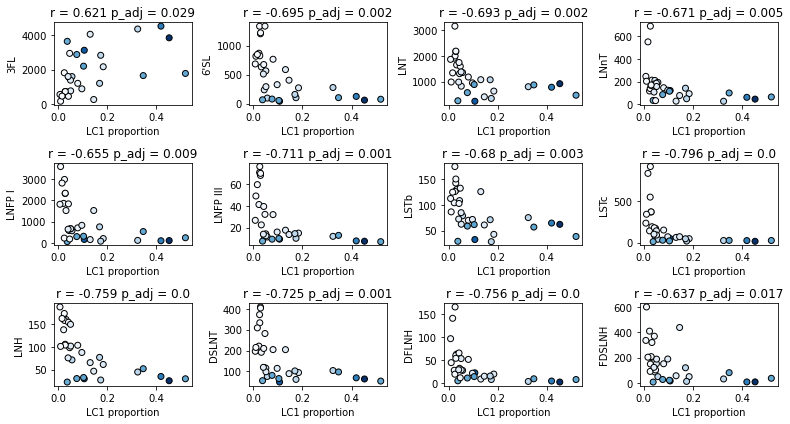

In [203]:
#TODO: color by timepostpartum
fix,ax=plt.subplots(3,4,figsize=(11,6))
ax = ax.ravel()
ax_ind = 0
for i in tests_df.index:
    if tests_df.loc[i,"p_adj"] <=.05:
        c = tests_df.loc[i,"celltype"]
        h = tests_df.loc[i,"HMO"]
        p= tests_df.loc[i,"p_adj"]
        
        tmp_overlap_samples = total_props.loc[overlap_samples,c][total_props.loc[overlap_samples,c].notna()].index
        times = HMO_sub.loc[tmp_overlap_samples,"time_postpartum_weeks"]
        ax[ax_ind].scatter(total_props.loc[tmp_overlap_samples,c],HMO_sub.loc[tmp_overlap_samples,h],c=times,cmap="Blues",edgecolors= "black")#,c=total_props.loc[overlap_samples,"color"],edgecolors= "black")
        ax[ax_ind].set_ylabel(h)
        if c =="luminal 2":
            c = "LC1"
        ax[ax_ind].set_xlabel(c+ " proportion")
        #s=scipy.stats.spearmanr(total_props.loc[tmp_overlap_samples,c],HMO_sub.loc[tmp_overlap_samples,h])

        #s=scipy.stats.spearmanr(props.loc[overlap_samples,c],HMO.loc[overlap_samples,h])
        ax[ax_ind].set_title("r = "+str(round(tests_df.loc[i,"r"],3))+" p_adj = "+str(round(p,3)))
        ax_ind += 1
        

plt.tight_layout()

In [153]:
# now do the same on epithelial subtypes
sub_counts = adata.obs.groupby(["sample",'Epithelial Cell Subclusters']).count()["include_for_analysis"].unstack()
sub_props = sub_counts.divide(sub_counts.sum(axis=1),axis=0)
overlap_samples = list(set(HMO_sub.index).intersection(set(sub_props.index)))

In [156]:
sig_corr=[]
all_tests = []
import scipy.stats
for c in sub_props.columns:
    for h in HMO_names:
        print(c)
        print(h)
        
        tmp_overlap_samples = sub_props.loc[overlap_samples,c][sub_props.loc[overlap_samples,c].notna()].index
        s=scipy.stats.spearmanr(sub_props.loc[tmp_overlap_samples,c],HMO_sub.loc[tmp_overlap_samples,h])
        print(s)
        all_tests.append([c,h,s[0],s[1]])
        if s[1] <0.05:
            sig_corr = sig_corr+[(c,h)]
tests_df= pd.DataFrame(all_tests, columns=["celltype","HMO","r","p"])

Cycling Lactocytes
2'FL
SignificanceResult(statistic=0.23138982120488125, pvalue=0.20257916673400395)
Cycling Lactocytes
3FL
SignificanceResult(statistic=-0.3025302733661284, pvalue=0.09237909931545286)
Cycling Lactocytes
DFLac
SignificanceResult(statistic=-0.18775212116782758, pvalue=0.3034714364648985)
Cycling Lactocytes
3'SL
SignificanceResult(statistic=-0.02970297229412897, pvalue=0.8717974916300532)
Cycling Lactocytes
6'SL
SignificanceResult(statistic=0.5016501987452893, pvalue=0.0034430381918962045)
Cycling Lactocytes
LNT
SignificanceResult(statistic=0.5691236172899773, pvalue=0.0006757384576947451)
Cycling Lactocytes
LNnT
SignificanceResult(statistic=0.48808217436402057, pvalue=0.004597657172728518)
Cycling Lactocytes
LNFP I
SignificanceResult(statistic=0.38320501293042936, pvalue=0.030395665488974693)
Cycling Lactocytes
LNFP II
SignificanceResult(statistic=0.2951962061330102, pvalue=0.10095737088743803)
Cycling Lactocytes
LNFP III
SignificanceResult(statistic=0.563858094126346,

In [157]:
tests_df["p_adj"] = statsmodels.stats.multitest.multipletests(tests_df["p"],method='bonferroni')[1]

In [161]:
tests_df[tests_df["p_adj"] <=.05]

,celltype,HMO,r,p,p_adj
13,Cycling Lactocytes,LNH,0.616852,1.699056e-04,1.936924e-02
61,LC1,6'SL,-0.598974,2.923340e-04,3.332608e-02
62,LC1,LNT,-0.766862,3.077595e-07,3.508458e-05
63,LC1,LNnT,-0.621701,1.458128e-04,1.662266e-02
66,LC1,LNFP III,-0.628357,1.177141e-04,1.341940e-02
67,LC1,LSTb,-0.679985,1.861104e-05,2.121659e-03
68,LC1,LSTc,-0.709311,5.496943e-06,6.266516e-04
69,LC1,DFLNT,-0.801320,3.588076e-08,4.090407e-06
70,LC1,LNH,-0.774265,2.002083e-07,2.282374e-05
71,LC1,DSLNT,-0.663856,3.439062e-05,3.920530e-03


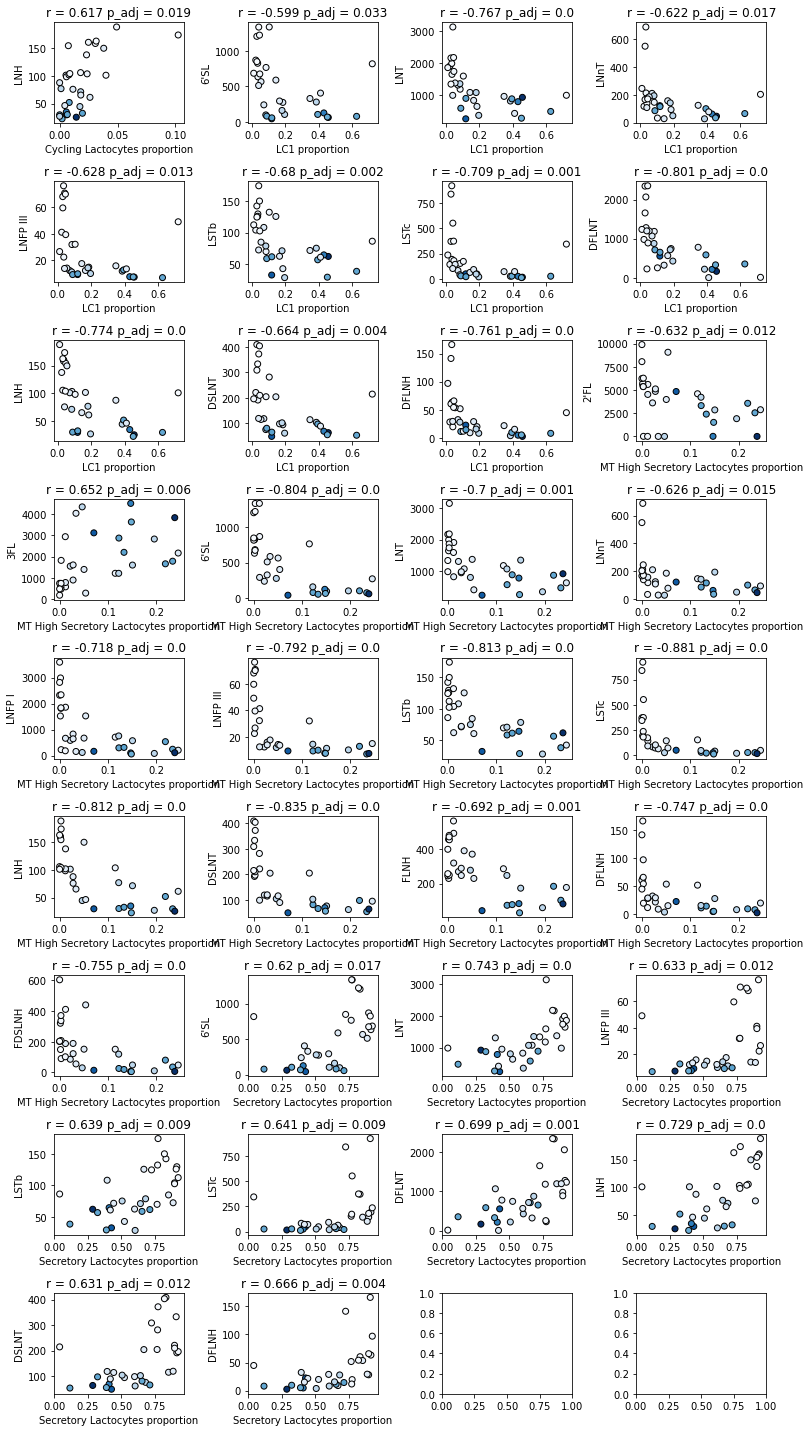

In [166]:
fix,ax=plt.subplots(9,4,figsize=(11,20))
ax = ax.ravel()
ax_ind = 0
for i in tests_df.index:
    if tests_df.loc[i,"p_adj"] <=.05:
        c = tests_df.loc[i,"celltype"]
        h = tests_df.loc[i,"HMO"]
        p= tests_df.loc[i,"p_adj"]
        
        tmp_overlap_samples = sub_props.loc[overlap_samples,c][sub_props.loc[overlap_samples,c].notna()].index
        times = HMO_sub.loc[tmp_overlap_samples,"time_postpartum_weeks"]
        ax[ax_ind].scatter(sub_props.loc[tmp_overlap_samples,c],HMO_sub.loc[tmp_overlap_samples,h],c=times,cmap="Blues",edgecolors= "black")#,c=total_props.loc[overlap_samples,"color"],edgecolors= "black")
        ax[ax_ind].set_ylabel(h)
        ax[ax_ind].set_xlabel(c+ " proportion")
        #s=scipy.stats.spearmanr(total_props.loc[tmp_overlap_samples,c],HMO_sub.loc[tmp_overlap_samples,h])

        #s=scipy.stats.spearmanr(props.loc[overlap_samples,c],HMO.loc[overlap_samples,h])
        ax[ax_ind].set_title("r = "+str(round(tests_df.loc[i,"r"],3))+" p_adj = "+str(round(p,3)))
        ax_ind += 1
        

plt.tight_layout()

In [ ]:
# get genes for each pathway pseudobulk them in LC1s and compare 

In [172]:
import pseudobulk_helpers
import heatmap_helper_functions

In [186]:
import importlib
importlib.reload(heatmap_helper_functions)

<module 'heatmap_helper_functions' from '/Users/snyquist/Dropbox (Gladstone)/helper_functions/heatmap_helper_functions.py'>

In [185]:
all_genes = []
for g in genelists:
    all_genes = all_genes + g
all_genes = [g for g in all_genes if g in adata.raw.var_names]

/Users/snyquist/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


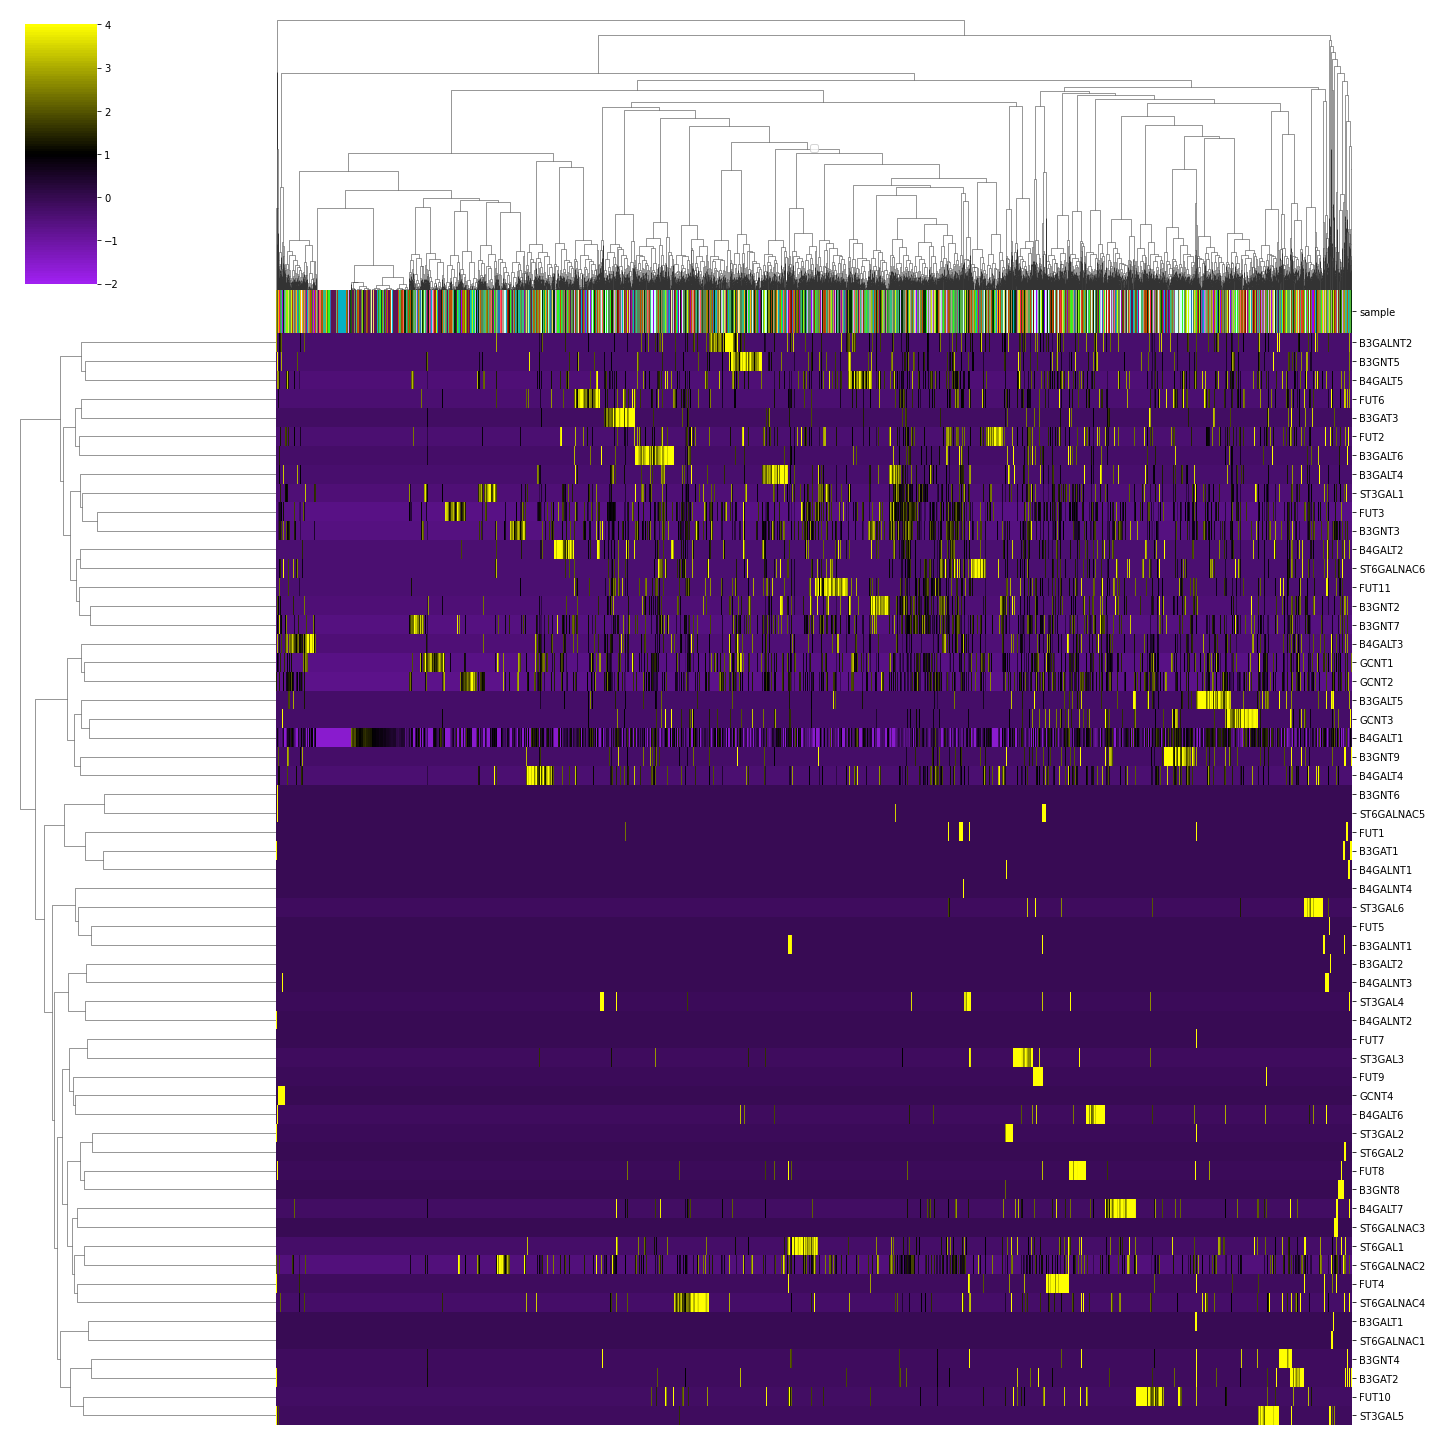

In [184]:
heatmap_helper_functions.heatmap_from_gene_list(adata[adata.obs['Epithelial Cell Subclusters']=="LC1"], all_genes,gene_cluster=True,cell_cluster=True,cell_ordering_keys=['sample'])

/Users/snyquist/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


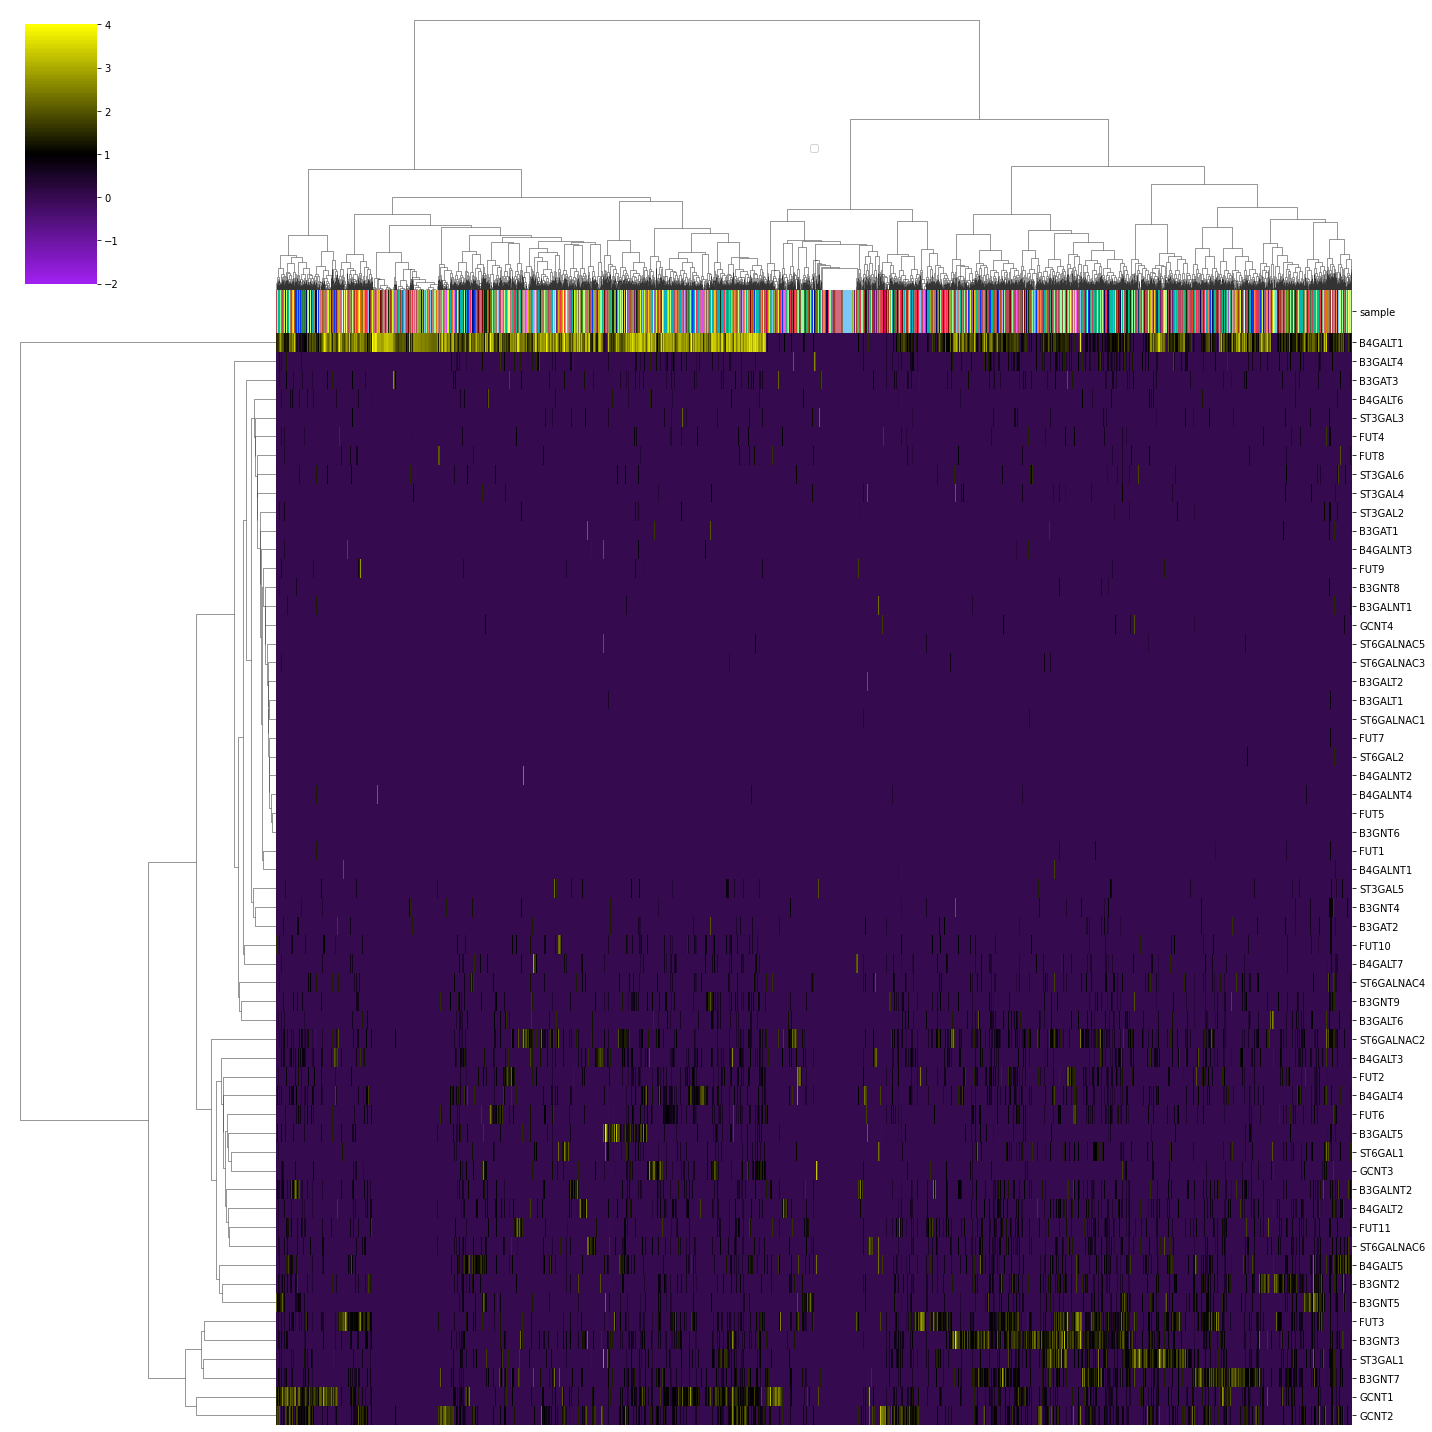

In [188]:
heatmap_helper_functions.heatmap_from_gene_list(adata[adata.obs['Epithelial Cell Subclusters']=="LC1"], all_genes,gene_cluster=True,cell_cluster=True,cell_ordering_keys=['sample'],z_score=None)

In [97]:
hmo_to_genes = {"2'FL":["FUT2"],
               "3FL":["FUT3","FUT6"],
               "DFLac":[],
               "3'SL":st32,
               "6'SL":["ST6GAL1"],
               "LNT":[],
               "LNnT":[],
               "LNFP I":b3gnt+b3galt+["FUT2"],
               "LNFP II":b3gnt+b3galt+["FUT3","FUT6"],
               "LNFP III":b3gnt+b4galt+["FUT3","FUT6"],
               "LSTb":b3gnt+b3galt+st6galnac,
               "LSTc":b3gnt+b4galt+["ST6GAL1"],
               "DFLNT":[], "LNH":[],"DSLNT":[],"FLNH":[],"DFLNH":[],
               "FDSLNH":[],
               "DSLNH":[]}

What are the overall distributions of the HMOs across all the samples that were collected?

In [ ]:
import seaborn as sns
HMO_stacked = HMO.unstack().reset_index()
HMO_stacked = HMO_stacked[HMO_stacked["level_0"]!="SUM"]
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(HMO_stacked, row="level_0", hue="level_0", aspect=10, height=1, palette=pal,sharey=False)
g.map(sns.kdeplot, 0,
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

#g.map(sns.kdeplot, 0, clip_on=False, color="w", lw=2, bw_adjust=.5)
#g2 = sns.FacetGrid(HMO_stacked, row="level_0", hue="level_0", aspect=10, height=1, palette=pal,sharey=False)
#g2.map(sns.rugplot,x="level_0",hue="Secretor")
g.refline(y=0, linewidth=1, linestyle="-", color=None, clip_on=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "level_0")
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [ ]:
def swarm_small(*args, **kwargs):
    return sns.swarmplot(*args, **kwargs, size=5, dodge=True)

g=sns.catplot(data=HMO_stacked, col="level_0", x="Secretor", kind="violin",y=0, sharey=False)
g.map_dataframe(swarm_small, x="Secretor", y=0,color="k")



In [ ]:
plt.scatter(HMO.loc[overlap_samples, "2'FL"],mean_sample_exp.loc[overlap_samples,"FUT2"])

In [ ]:
HMO

In [ ]:
for i,g in hmo_to_genes.items():
    g = [m for m in g if m in mean_sample_exp.columns]
    if len(g)>1:
        fig,ax = plt.subplots(1,len(g),figsize=(2*len(g),2))
        for ind,l in enumerate(g):
            ax[ind].scatter(HMO.loc[overlap_samples, i],mean_sample_exp.loc[overlap_samples,l])
            ax[ind].set_ylabel(l)
            ax[ind].set_xlabel(i)
            s=scipy.stats.spearmanr(HMO.loc[overlap_samples, i],mean_sample_exp.loc[overlap_samples,l])
            ax[ind].set_title("r = "+str(round(s[0],3))+" p = "+str(round(s[1],4)))
            
        plt.tight_layout()

In [ ]:
plt.scatter(HMO.loc[overlap_samples, "3FL"],mean_sample_exp.loc[overlap_samples,"FUT6"])

In [ ]:
HMO["2'FL"]

In [ ]:
counts = pd.read_csv("/Users/snyquist/Dropbox (Gladstone)/Yarden_supply/differential_abundance/epi_celltype_counts_forDA.csv",index_col=0)

In [ ]:
counts

In [ ]:
meta = pd.read_csv("/Users/snyquist/Dropbox (Gladstone)/Yarden_supply/differential_abundance/supply_donor_metadata.csv",index_col=0)

In [ ]:
props=counts.divide(counts.sum(axis=1),axis=0)

In [ ]:
props["Milk supply"] =meta["Milk supply"]

In [ ]:
overlap_samples.remove('1033-v1') #remove non-secretor

In [ ]:
overlap_samples

In [ ]:
sig_corr=[]
import scipy.stats
for c in props.columns:
    for h in HMO.columns:
        print(c)
        print(h)
        s=scipy.stats.spearmanr(props.loc[overlap_samples,c],HMO.loc[overlap_samples,h])
        print(s)
        if s[1] <0.05:
            sig_corr = sig_corr+[(c,h)]

In [ ]:
sig_corr

In [ ]:
supply_colors={"Low":"#f0e442","Normal":"#0071b2","High":"#cc79a7"}
props["color"] = props["Milk supply"].map(supply_colors)

In [ ]:
c="LC2-Secretory"
h="LNT"
for c,h in sig_corr:
    plt.figure()
    plt.scatter(props.loc[overlap_samples,c],HMO.loc[overlap_samples,h],c=props.loc[overlap_samples,"color"],edgecolors= "black")
    plt.ylabel(h)
    plt.xlabel(c+ " proportion")
    s=scipy.stats.spearmanr(props.loc[overlap_samples,c],HMO.loc[overlap_samples,h])
    plt.title("r = "+str(s[0])+" p = "+str(s[1]))

In [ ]:
c="LC2-Secretory"
h="LNFP III"
plt.scatter(props.loc[overlap_samples,c],HMO.loc[overlap_samples,h])

In [ ]:
counts_all = pd.read_csv("/Users/snyquist/Dropbox (Gladstone)/Yarden_supply/differential_abundance/all_cells_celltype_counts_forDA.csv",index_col=0)

In [ ]:
props_all=counts_all.divide(counts_all.sum(axis=1),axis=0)
props_all["Milk supply"] =meta["Milk supply"]

In [ ]:
sig_corr=[]
import scipy.stats
for c in props_all.columns:
    for h in HMO.columns:
        print(c)
        print(h)
        s=scipy.stats.spearmanr(props_all.loc[overlap_samples,c],HMO.loc[overlap_samples,h])
        print(s)
        if s[1] <0.05:
            sig_corr = sig_corr+[(c,h)]

In [ ]:
props_all["color"] = props_all["Milk supply"].map(supply_colors)

In [ ]:
len(sig_corr)

In [ ]:
fix,ax=plt.subplots(3,7,figsize=(14,6))
ax = ax.ravel()
for i,x in enumerate(sig_corr):
    if x[0] != "Milk supply":
        print(x[0])
        c=x[0]
        h=x[1]
        ax[i].scatter(props_all.loc[overlap_samples,c],HMO.loc[overlap_samples,h],c=props_all.loc[overlap_samples,"color"],edgecolors= "black")
        ax[i].set_ylabel(h)
        ax[i].set_xlabel(c+ " proportion")
        s=scipy.stats.spearmanr(props_all.loc[overlap_samples,c],HMO.loc[overlap_samples,h])
        ax[i].set_title("r = "+str(round(s[0],3))+" p = "+str(round(s[1],4)))
    
    
plt.tight_layout()

In [ ]:
all_milk_epi

In [ ]:
sc.pl.dotplot(all_milk_epi, ["NECTIN4","FOLR1"],groupby='general clusters')

In [ ]:
sc.tl.rank_genes_groups(all_milk_epi,groupby="general clusters",pts=True)